<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/evolution_strategies/function_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def evolution_strategy(
    f,
    population_size,
    sigma,
    lr,
    initial_params,
    num_iters):

  # assume initial params is a 1-D array
  num_params = len(initial_params)
  reward_per_iteration = np.zeros(num_iters)

  params = initial_params
  for t in range(num_iters):
    N = np.random.randn(population_size, num_params)
    R = np.zeros(population_size) # stores the reward

    # loop through each "offspring"
    for j in range(population_size):
      params_try = params + sigma*N[j]
      R[j] = f(params_try)

    m = R.mean()
    A = (R - m) / R.std()
    reward_per_iteration[t] = m
    params = params + lr/(population_size*sigma) * np.dot(N.T, A)

  return params, reward_per_iteration

In [0]:
def reward_function(params):
  x0 = params[0]
  x1 = params[1]
  x2 = params[2]
  return -(x0**2 + 0.1*(x1 - 1)**2 + 0.5*(x2 + 2)**2)

In [0]:
best_params, rewards = evolution_strategy(
  f=reward_function,
  population_size=50,
  sigma=0.1,
  lr=1e-3,
  initial_params=np.random.randn(3),
  num_iters=500,
)

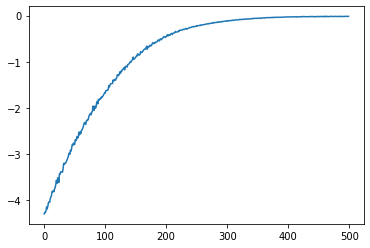

In [5]:
# plot the rewards per iteration
plt.plot(rewards)
plt.show()

In [7]:
print("Final params:", best_params)  # Expected: 0, 1, -2

Final params: [ 0.01077611  0.87421263 -2.00662457]
